包括内容：引用外界数据，index类型【时间类型】，作图【折线，散点，直方，图形叠加】，作图类型【inline vs. notebook】

这一章主要讲的是对数据的处理，以及一些基本的数据可视化操作。这一章会有更多对于DataFrame数据结构的介绍，以及一些DataFrame方程的介绍。

DataFrame介绍：https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

另外，我在note2中做的是比较详细的介绍，在note3开始，就不会做特别详细的介绍。我只会解释一些对于没有编程基础的同学难以理解的概念，剩下的问题，请自行谷歌找寻答案。

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #作图包

先回到DataFrame。这一章开始我们引用真实数据。

In [4]:
url="https://www.dropbox.com/s/9346pp2iu5prv8s/MonthlyFactors.csv?dl=1" #注意看数据结尾，结尾有显示文件格式。
Data = pd.read_csv(url, index_col=0, na_values=-99)
Data.head()

,RF,MKT,SMB,HML,Mom
Date,,,,,
7/31/1926,0.22,3.18,-2.30,-2.87,NaN
8/31/1926,0.25,2.89,-1.40,4.19,NaN
9/30/1926,0.23,0.59,-1.32,0.01,NaN
10/31/1926,0.32,-2.92,0.04,0.51,NaN
11/30/1926,0.31,2.84,-0.20,-0.35,NaN


In [5]:
Data.min()

RF     -0.06
MKT   -29.10
SMB   -17.17
HML   -13.28
Mom   -52.26
dtype: float64

In [6]:
Index = Data.min().idxmin()
Index

'Mom'

In [7]:
Data[Index].idxmin()

'8/31/1932'

读取数据，至少需要一个文件来源的地址，这里我们用的是一个链接来引用网络数据。注意后面必须是"dl=1"不然无法引用。

read是pandas包里的方程。如果是csv文件就用read_csv()方程，如果是xslx文件就用read_excel()方程。

index_col目的是告诉python，以哪一列作为行index。

DataFrame会记录空值，在计算均值等时候会跳过均值，就和excel一样。但是有时候，原数据记录者会用别的方式记录空缺数据，比如"-99"，所以可以告诉read方程，那些数据也可以被记录成空值。

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html 中有记录那些符号read默认是空值，在此以外的表达方式都要输入。

In [8]:
Data.index

Index(['7/31/1926', '8/31/1926', '9/30/1926', '10/31/1926', '11/30/1926',
       '12/31/1926', '1/31/1927', '2/28/1927', '3/31/1927', '4/30/1927',
       ...
       '9/30/2016', '10/31/2016', '11/30/2016', '12/31/2016', '1/31/2017',
       '2/28/2017', '3/31/2017', '4/30/2017', '5/31/2017', '6/30/2017'],
      dtype='object', name='Date', length=1092)

Data.index可以直接查看Data的index是什么。注意看，虽然很显然，Data的index是时间，但是看看上面的dtype，显示的是object。也就是说，这里并不是时间，我们需要在read()加条件。

In [7]:
Data1=pd.read_csv(url,index_col=0,parse_dates=True,na_values=-99)
Data1.head()

,RF,MKT,SMB,HML,Mom
Date,,,,,
1926-07-31,0.22,3.18,-2.30,-2.87,NaN
1926-08-31,0.25,2.89,-1.40,4.19,NaN
1926-09-30,0.23,0.59,-1.32,0.01,NaN
1926-10-31,0.32,-2.92,0.04,0.51,NaN
1926-11-30,0.31,2.84,-0.20,-0.35,NaN


加入parse_dates=True 旨在告诉read，index这一列指得是时间。可以看到，如果index是时间，显示的格式是不一样的。在底下也会显示dtype是'datetime64[ns]'。但是，parse_dates=True仅在源文件中，index那一列就是按照时间格式记录的，也就是在excel中单元格的数据类型是时间。如果不是时间的话，会怎么样？

In [8]:
url2="https://www.dropbox.com/s/5qituivg6ovlscr/Homework3.xlsx?dl=1"
Data2=pd.read_excel(url2, index_col=0, parse_dates=True)
Data2.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Risk-free rate
192607,1.45,15.55,4.69,-1.18,2.90,0.83,0.11,1.77,7.04,2.16,0.22
192608,3.97,3.68,2.81,3.47,2.66,2.17,-0.71,4.25,-1.69,4.38,0.25
192609,1.14,4.80,1.15,-3.39,-0.38,2.41,0.21,0.69,2.04,0.29,0.23
192610,-1.24,-8.23,-3.63,-0.78,-4.58,-0.11,-2.29,-0.57,-2.63,-2.85,0.32
192611,5.21,-0.19,4.10,0.01,4.71,1.63,6.43,5.42,3.71,2.11,0.31


In [9]:
Data2.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505,
            201506, 201507],
           dtype='int64', length=1069)

可以看到，如果源文件中并不是按照时间格式记录index，那么你就算告诉python parse_dates=True 也没个卵用。我们引入另一个方程,pandas包的to_datetime()。这个方程可以将一个数字转换成日期，需要填写你数据的格式，如果年月日就是"%Y%m%d"，注意大小写，格式看http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html

In [10]:
Data2.index=pd.to_datetime(Data2.index, format='%Y%m')
Data2.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01'],
              dtype='datetime64[ns]', length=1069, freq=None)

为啥子我们要这么费劲的转换index成时间格式，因为Datatimes类型的index可以有以下的简便运算。

index.year 返回年份；

index.quarter 返回季度； 

index.month 返回月份； 

index.week 返回周数； 

index.day 返回年中的日数（2月1日是第32日）；

index.daysinmonth 返回月中的日数 (2月1日是第1日)； 

index.weekday, indexdayofweek 返回周中日数 （周一返回0）；

index.weekday_name 返回周中日数名 （周一返回"Monday"）；

Datatimes类型介绍https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html

In [11]:
Test=Data2
Test['y']=Test.index.year
Num=Test.groupby('y').sum()
Num.shape[0]

90

In [12]:
Data1.head()

,RF,MKT,SMB,HML,Mom
Date,,,,,
1926-07-31,0.22,3.18,-2.30,-2.87,NaN
1926-08-31,0.25,2.89,-1.40,4.19,NaN
1926-09-30,0.23,0.59,-1.32,0.01,NaN
1926-10-31,0.32,-2.92,0.04,0.51,NaN
1926-11-30,0.31,2.84,-0.20,-0.35,NaN


In [13]:
Data1.tail()

,RF,MKT,SMB,HML,Mom
Date,,,,,
2017-02-28,0.04,3.61,-1.79,-1.80,-1.71
2017-03-31,0.03,0.20,1.13,-3.32,-0.91
2017-04-30,0.05,1.14,0.55,-2.16,0.33
2017-05-31,0.06,1.12,-2.58,-3.65,1.51
2017-06-30,0.06,0.84,2.30,1.20,-0.18


In [14]:
Data1.index.year

Int64Index([1926, 1926, 1926, 1926, 1926, 1926, 1927, 1927, 1927, 1927,
            ...
            2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1092)

并且，这个分类可以直接在引用数据时引用。

In [15]:
Data1['2000']

,RF,MKT,SMB,HML,Mom
Date,,,,,
2000-01-31,0.41,-4.33,5.01,-0.45,1.88
2000-02-29,0.43,2.88,22.08,-10.49,18.38
2000-03-31,0.47,5.67,-17.17,7.86,-6.80
2000-04-30,0.46,-5.94,-7.77,8.57,-8.52
2000-05-31,0.50,-3.92,-4.94,2.39,-9.06
2000-06-30,0.40,5.04,13.95,-10.03,16.49
2000-07-31,0.48,-2.03,-2.78,8.15,-0.12
2000-08-31,0.50,7.53,-1.11,-0.69,5.70
2000-09-30,0.51,-4.94,-1.40,6.23,2.15


In [16]:
Data1.loc['1990',['RF','MKT']]

,RF,MKT
Date,,
1990-01-31,0.57,-7.28
1990-02-28,0.57,1.68
1990-03-31,0.64,2.47
1990-04-30,0.69,-2.67
1990-05-31,0.68,9.10
1990-06-30,0.63,-0.46
1990-07-31,0.68,-1.22
1990-08-31,0.66,-9.49
1990-09-30,0.60,-5.52


另外一个就是，如果你的index是整数，那么在200001到200012的大小和到200101的大小分别是11和100，这样做出来的图十分不平均。但是2000-01到2000-12和到2001-01的大小就分别是11和12了。

说完了index，我们来说数据处理。你可以对所有数据做数学运算，包括加减乘除幂。

In [17]:
re=Data1[['RF','MKT','SMB','HML']]
re.head()

,RF,MKT,SMB,HML
Date,,,,
1926-07-31,0.22,3.18,-2.30,-2.87
1926-08-31,0.25,2.89,-1.40,4.19
1926-09-30,0.23,0.59,-1.32,0.01
1926-10-31,0.32,-2.92,0.04,0.51
1926-11-30,0.31,2.84,-0.20,-0.35


In [18]:
RE=re/100+1
RE.head() #原数据是百分比回报率，需要除100加1转换成绝对回报率

,RF,MKT,SMB,HML
Date,,,,
1926-07-31,1.0022,1.0318,0.9770,0.9713
1926-08-31,1.0025,1.0289,0.9860,1.0419
1926-09-30,1.0023,1.0059,0.9868,1.0001
1926-10-31,1.0032,0.9708,1.0004,1.0051
1926-11-30,1.0031,1.0284,0.9980,0.9965


In [19]:
RE['PRE']=RE['MKT']-RE['RF'] #列间运算，并重新定义新的一列叫‘PRE’
RE.head()

,RF,MKT,SMB,HML,PRE
Date,,,,,
1926-07-31,1.0022,1.0318,0.9770,0.9713,0.0296
1926-08-31,1.0025,1.0289,0.9860,1.0419,0.0264
1926-09-30,1.0023,1.0059,0.9868,1.0001,0.0036
1926-10-31,1.0032,0.9708,1.0004,1.0051,-0.0324
1926-11-30,1.0031,1.0284,0.9980,0.9965,0.0253


In [20]:
RE.info()          #查看DataFrame在计算机储存上的信息

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 1926-07-31 to 2017-06-30
Data columns (total 5 columns):
RF     1092 non-null float64
MKT    1092 non-null float64
SMB    1092 non-null float64
HML    1092 non-null float64
PRE    1092 non-null float64
dtypes: float64(5)
memory usage: 91.2 KB


In [21]:
RE.describe()       #查看DataFrame在统计上的信息

,RF,MKT,SMB,HML,PRE
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,1.002766,1.009333,1.002101,1.003881,0.006567
std,0.002546,0.053450,0.032064,0.035006,0.053556
min,0.999400,0.709000,0.828300,0.867200,-0.291300
25%,1.000300,0.982275,0.984400,0.987275,-0.019775
50%,1.002400,1.012600,1.000700,1.001900,0.010100
75%,1.004300,1.039600,1.017550,1.017525,0.036500
max,1.013500,1.389500,1.367000,1.354600,0.388500


In [22]:
RE['RF'].mean()     #单独的统计信息。

1.002765567765567

In [23]:
RE.head().mean(axis=1) #默认是axis=0， 计算的是单列的统计量， 改成axis=1， 可以计算单行统计量。

Date
1926-07-31    0.80238
1926-08-31    0.81714
1926-09-30    0.79974
1926-10-31    0.78942
1926-11-30    0.81026
dtype: float64

In [24]:
print(np.std(RE['RF'])) #numpy包中的标准差方程，返回总体标准差
print(RE['RF'].std())   #pandas包中对于dataframe的标准差方程，返回样本标准差

0.00254489097976469
0.002546057023802858


In [25]:
Var_RE=RE['RF'].std()**2  #**表示几次幂，可用于指数，开方运算
Var_RE

6.482406368455867e-06

In [26]:
ERF_c=np.log(RE['RF'].mean() ) #numpy包中的取ln，用于求连续利率

另外一个比较难重要的方程，sum() vs. cumsum(), prod() vs. cumprod()

sun返回的是输入series的所有元素的总和,是一个值；cumsum()是累计总和，是一个series。prod() cumprod()同理。

In [27]:
series=pd.Series([0,1,2,3,4,5])
series.sum()

15

In [28]:
series.cumsum()

0     0
1     1
2     3
3     6
4    10
5    15
dtype: int64

In [29]:
cumsum=[]           #cum sum 实际上就是跑一个for循环

for i in range(series.size):     #seriestest.size值得是seriestest里面有几个元素
    x = series[:i+1].sum()       #注意index是左闭右开的问题
    cumsum.append(x)
    
cumsum

[0, 1, 3, 6, 10, 15]

除了数据处理，还有就是作图。目前我们学习的只有散点图，直方图，折线图。

先来说matplotlib.pyplot 这个作图包。关于%matplotlib inline是什么意思？这个意思就是告诉python图像显示的格式。如果不加这一行，在跑一些作图代码的时候，python只会返还代码，不会返还图像。同样，还有一个格式是notebook，比inline有更多操作。inline会将输出的图像镶嵌在你的文件之中，没个cell独立作图。notebook则是会生成一个可互动窗口，可以对图像进行修改。

In [30]:
%matplotlib inline

plot()方程介绍：https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.plot.html

plot()方程有两种做法。第一种是针对有index的DataFrame,可以直接引用。这样的话index会作为横坐标，数据会作为纵坐标。

In [31]:
RE['RF'].head()

Date
1926-07-31    1.0022
1926-08-31    1.0025
1926-09-30    1.0023
1926-10-31    1.0032
1926-11-30    1.0031
Name: RF, dtype: float64

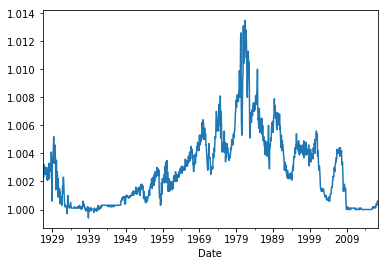

In [32]:
RE['RF'].plot()

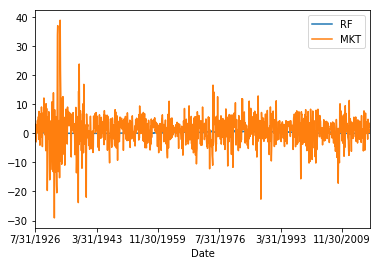

In [33]:
Data[['RF','MKT']].plot() #可以直接做出多组数据的折线图。

另外一种方法是在matplotlib.pyplot中引入plot方程，并自行输入x值和y值

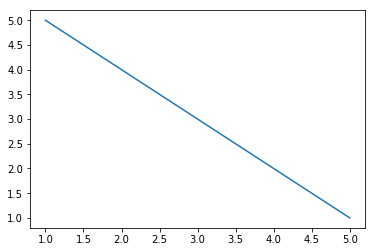

In [34]:
x=[1,2,3,4,5]
y=[5,4,3,2,1]
plt.plot(x,y)

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

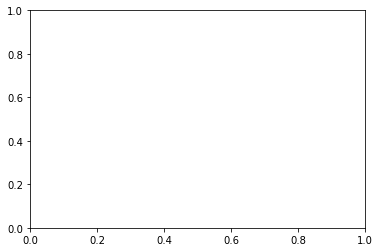

In [35]:
x=[1,2,3,4,5]
z=[1,2,3,4,5,6]
plt.plot(x,z) #注意在这个情况下，要保证x,y两个数据的长度要一致。

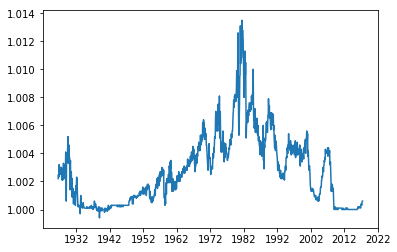

In [36]:
plt.plot(RE.index, RE.RF)
#plt.plot(RE.index, RE.MKT)

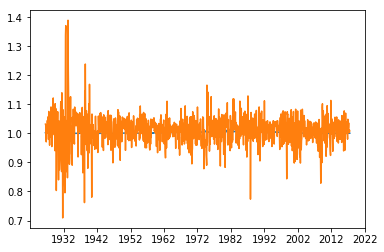

In [37]:
plt.plot(RE.index, RE.RF)
plt.plot(RE.index, RE.MKT)  #同一个cell里面的plot会叠加，但是不同于直接在dataframe里面调用plot，这里没有index来区别不同的线。

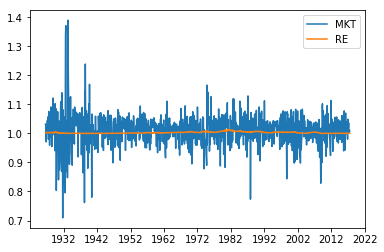

In [38]:
plt.plot(RE.index, RE.MKT)
plt.plot(RE.index, RE.RF)

plt.legend(['MKT','RE']) #可以通过legend来添加index，按顺序添加。

RF     0.254606
MKT    5.344988
SMB    3.206368
HML    3.500570
Mom    4.721285
dtype: float64


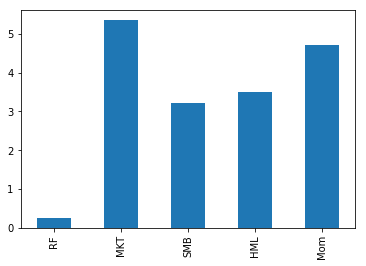

In [39]:
print(Data.std())
Data.std().plot(kind='bar') #加上 kind='bar' 可以做出直方图

RF     0.276557
MKT    0.933278
SMB    0.210082
HML    0.388123
Mom    0.655663
dtype: float64


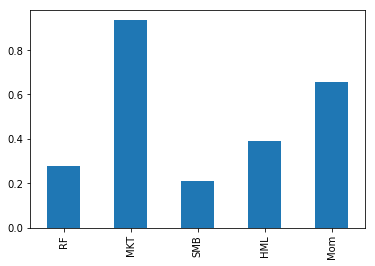

In [40]:
print(Data.mean())
Data.mean().plot.bar() #也可以改成用plot.bar()b

(array([   2.,  167.,  121.,   45.,   59.,   52.,   35.,   43.,   47.,
          54.,   46.,   39.,   48.,   77.,   43.,   34.,   28.,   21.,
          15.,   23.,   17.,   13.,   11.,   10.,   11.,    2.,    4.,
           1.,    4.,    2.,    1.,    3.,    3.,    1.,    1.,    0.,
           5.,    1.,    2.,    1.]),
 array([-0.06   , -0.02475,  0.0105 ,  0.04575,  0.081  ,  0.11625,
         0.1515 ,  0.18675,  0.222  ,  0.25725,  0.2925 ,  0.32775,
         0.363  ,  0.39825,  0.4335 ,  0.46875,  0.504  ,  0.53925,
         0.5745 ,  0.60975,  0.645  ,  0.68025,  0.7155 ,  0.75075,
         0.786  ,  0.82125,  0.8565 ,  0.89175,  0.927  ,  0.96225,
         0.9975 ,  1.03275,  1.068  ,  1.10325,  1.1385 ,  1.17375,
         1.209  ,  1.24425,  1.2795 ,  1.31475,  1.35   ]),
 <a list of 40 Patch objects>)

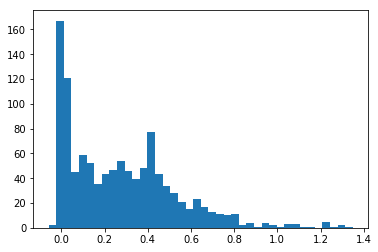

In [41]:
#概率密度直方图
plt.hist(Data.RF,bins=40)

[   2.  167.  121.   45.   59.   52.   35.   43.   47.   54.   46.   39.
   48.   77.   43.   34.   28.   21.   15.   23.   17.   13.   11.   10.
   11.    2.    4.    1.    4.    2.    1.    3.    3.    1.    1.    0.
    5.    1.    2.    1.]
[-0.06    -0.02475  0.0105   0.04575  0.081    0.11625  0.1515   0.18675
  0.222    0.25725  0.2925   0.32775  0.363    0.39825  0.4335   0.46875
  0.504    0.53925  0.5745   0.60975  0.645    0.68025  0.7155   0.75075
  0.786    0.82125  0.8565   0.89175  0.927    0.96225  0.9975   1.03275
  1.068    1.10325  1.1385   1.17375  1.209    1.24425  1.2795   1.31475
  1.35   ]


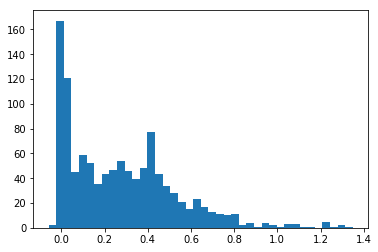

In [42]:
counts,bins,patches =  plt.hist(Data.RF,bins=40) #hist 作图可以返回值，也可以不返回，但是返回一定返回三个值
print(counts)       #第一个值是每一个区间的数量
print(bins)         #第二个值是每一个区间的划分

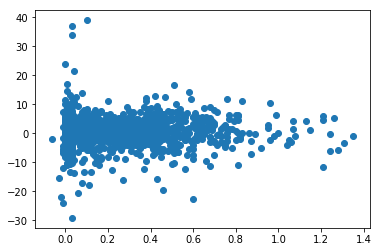

In [43]:
plt.scatter(Data.RF, Data.MKT) #散点图

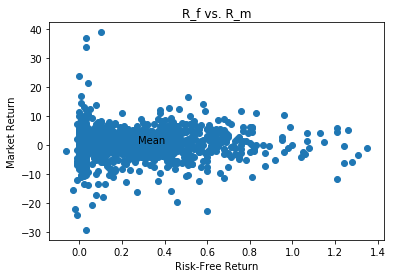

In [44]:
plt.xlabel('Risk-Free Return')
plt.ylabel('Market Return')
plt.title('R_f vs. R_m')                #可以添加x,y的标题。

plt.scatter(Data.RF, Data.MKT)  

plt.text(Data.RF.mean(),Data.MKT.mean(),'Mean') #可以在指定位置添加text，可以作为某些数据的label。格式为(x坐标，y坐标，添加内容)

关于散点图还有很多可修改的内容，包括点的类型和颜色等等：https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html

关于dataframe的visualize还有很多用法:https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

<IPython.core.display.Javascript object>


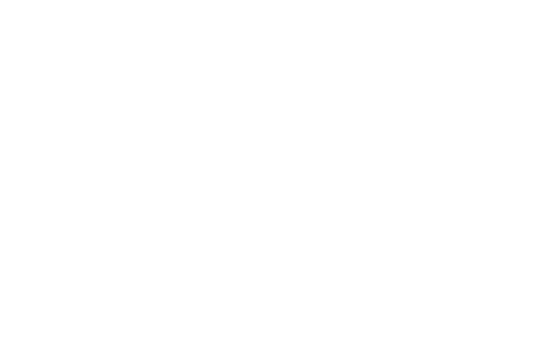

<IPython.core.display.Javascript object>


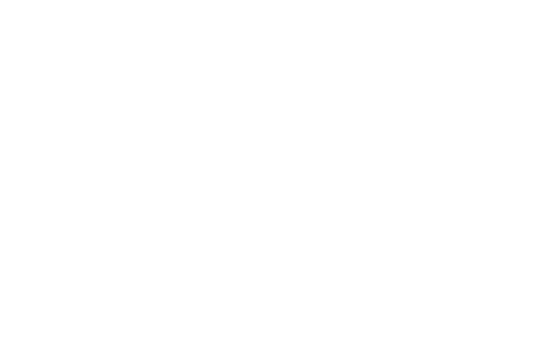

In [45]:
%matplotlib notebook
RE.RF.plot()

<IPython.core.display.Javascript object>


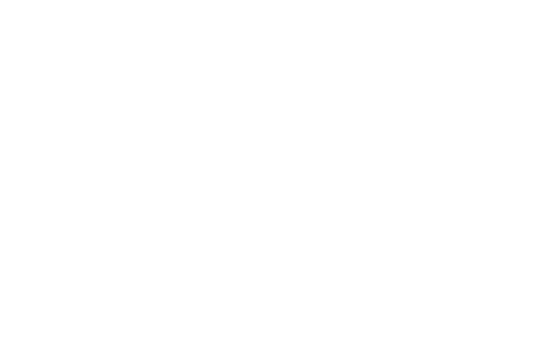

<IPython.core.display.Javascript object>


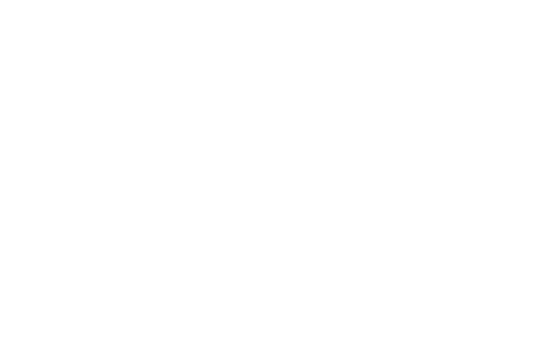

In [46]:
plt.scatter(Data.RF, Data.MKT)  

notebook格式，除了可修改这个特点以外，还有一个特点就是一旦启动了notebook格式，以下所有的cell中的作图都会叠加在一个图上。所以很有可能会把图越做越乱。解决的办法是每次要做新图就重新输入一次%matplotlib notebook

<IPython.core.display.Javascript object>


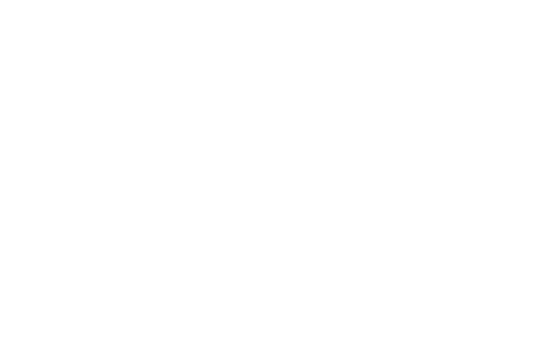

In [47]:
%matplotlib notebook
RE.RF.plot()

<IPython.core.display.Javascript object>


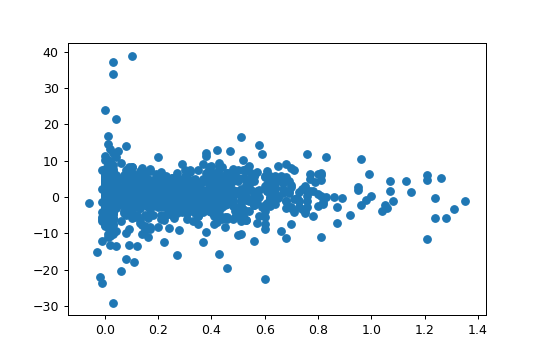

In [48]:
%matplotlib notebook
plt.scatter(Data.RF, Data.MKT)  